In [120]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import csv

main_df = pd.read_csv("s208 - Sheet1.csv")

In [121]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [122]:
num_of_peaks = 50
main_df.head()

,Signal1,Signal2,ID
0,44,57,0
1,51,70,1
2,24,66,2
3,20,75,3
4,5,52,4


In [123]:
len(main_df)

36903

In [124]:
avg = main_df["Signal1"].mean()
print("Average1 :",avg)
avg2 = main_df["Signal2"].mean()
print("Average2:",avg2)

Average1 : 24.34132726336612
Average2: 272.3750101617755


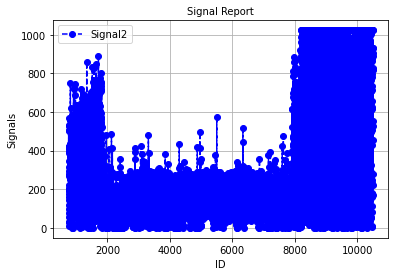

In [125]:
import csv
  
x = []
y1 = []
y2 = []
  
for i in range(754,10508):
    x.append(main_df["ID"][i])
    y1.append(main_df["Signal1"][i])
    y2.append(main_df["Signal2"][i])

  
  
plt.plot(x, y2, color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Signal2")
  
plt.xlabel('ID')
plt.ylabel('Signals')
plt.title('Signal Report', fontsize = 10)
plt.grid()
plt.legend()
plt.show()


In [126]:
for i in range(len(main_df)):
    if(main_df.at[i,'Signal1']<avg and main_df.at[i,'Signal2']<avg2):
        main_df = main_df.drop(index = i)
        #print(i)

In [127]:
id = []
for i in range(len(main_df)):
    id.append(i)
main_df["ID"] = id

In [128]:
main_df.set_index("ID", inplace = True)
main_df.head()


,Signal1,Signal2
ID,,
0,44,57
1,51,70
2,43,3
3,37,17
4,52,32


In [129]:
len(main_df)

12757

Saving the raw data in a file

main_df.to_csv("f051ff_raw.csv")

In [130]:
limit = int(len(main_df)/num_of_peaks)
rms_id = []
rms_values = []
mean_values = []
kurtosis_values = []
sd_values = []
skew_values = []
rms_values2 = []
mean_values2 = []
kurtosis_values2 = []
sd_values2 = []
skew_values2 = []

In [131]:
for i in range(num_of_peaks):
    rms_id.append(i)  

In [132]:
from scipy import stats
from scipy.stats import kurtosis
for i in range(num_of_peaks):
    val = 0
    mean = 0
    val2 = 0
    mean2 = 0
    part_data_s1 = []
    part_data_s2 = []
    for j in range(limit):
        val = val + (main_df.at[i+j, 'Signal1'])*(main_df.at[i+j, 'Signal1'])
        mean = mean + (main_df.at[i+j, 'Signal1']) 
        val2 = val2 + (main_df.at[i+j, 'Signal2'])*(main_df.at[i+j, 'Signal2'])
        mean2 = mean2 + (main_df.at[i+j, 'Signal2']) 
        part_data_s1.append(main_df.at[i+j, 'Signal1'])
        part_data_s2.append(main_df.at[i+j, 'Signal2'])
    val = val/limit
    mean = mean/limit
    val2 = val2/limit
    mean2 = mean2/limit
    val = math.sqrt(val)
    val2 = math.sqrt(val)
    rms_values.append(val) 
    rms_values2.append(val2)
    mean_values.append(mean)
    mean_values2.append(mean2)
    kurtosis_values.append(kurtosis(part_data_s1)) 
    kurtosis_values2.append(kurtosis(part_data_s2))
    sd_values.append(stats.tstd(part_data_s1))
    sd_values2.append(stats.tstd(part_data_s2))
    skew_values.append(stats.skew(part_data_s1))
    skew_values2.append(stats.skew(part_data_s2))

In [133]:
print(rms_id) 
print(len(rms_id)) 
print(rms_values) 
print(len(rms_values))  
print(rms_values2) 
print(len(rms_values2)) 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
50
[43.11835058142583, 43.0739901501008, 43.060468199598425, 43.03204460335458, 43.05003928398836, 42.970578169665046, 42.913821531429384, 42.91048594366613, 42.94131882866545, 42.95478699155888, 43.031042146749066, 42.97869969474391, 42.982668645880615, 42.951043722623844, 42.92569960145681, 42.918436095258, 42.92574527999645, 42.84797567689567, 42.90491082089578, 42.79068984317619, 42.80571704532825, 42.66219339295671, 42.7053745986128, 42.55732005420546, 42.589007142826944, 42.51062151011757, 42.58679718078887, 42.47730651333075, 42.48935276088841, 42.40689917972329, 42.46123953378066, 42.339385085423295, 42.35531311440877, 42.26410891005256, 42.25742770304922, 42.131958900391915, 42.16470971200963, 42.0846485913667, 42.14680226513597, 42.01857665739911, 42.0426487477358, 41.960485613743515, 42.

In [134]:
print(rms_values2) 
print(len(rms_values2))  

[6.566456470686898, 6.563077795524048, 6.562047561516026, 6.559881447355171, 6.561252874565067, 6.555194746890823, 6.55086418203197, 6.55060958565431, 6.552962599364157, 6.5539901580303646, 6.559805038775853, 6.555814190071581, 6.55611688775304, 6.553704580054234, 6.551770722595291, 6.5512163828756265, 6.5517742085633905, 6.545836514678293, 6.550184029544191, 6.541459305321419, 6.54260781686693, 6.531630224756811, 6.5349349345355225, 6.523597171362243, 6.526025370991668, 6.520016986950078, 6.52585604965271, 6.517461661822857, 6.518385748088894, 6.5120579834429675, 6.516228935034485, 6.506872143005677, 6.508095966902207, 6.501085210182417, 6.500571336663357, 6.490913564390756, 6.4934358941942, 6.487268191724981, 6.4920568593579, 6.482173760197972, 6.484030285843504, 6.477691379939578, 6.481766982488435, 6.472122298753734, 6.473423759845207, 6.464296995854109, 6.4685609602214615, 6.46252148343279, 6.4606645261206355, 6.454092364985149]
50


In [135]:
data = {'ID': rms_id,
        'rms':rms_values,
        'mean': mean_values,
        'kurtosis':kurtosis_values,
        'SD': sd_values,
        'skewness':skew_values,
        'rms2':rms_values2,
        'mean2': mean_values2,
        'kurtosis2':kurtosis_values2,
        'SD2': sd_values2,   
        'skewness2':skew_values2
       }
df = pd.DataFrame(data)

In [136]:
df.to_csv("s208_50.csv")